In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import shutil


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


import warnings
warnings.filterwarnings(action = 'once')#, category = DeprecationWarning)

C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: 

# There is corrupted EXIF for some images, need to clean them up

In [ ]:
from PIL import Image
cur_path = './images/data/Cat'
new_path = './images/new/Cat/'

for file in os.listdir(cur_path):
    try:
        curpath = os.path.join (cur_path, file)
        image = Image.open(curpath)
        if image.mode != 'RGB':
            image = image.convert('RGB')
        image.save(new_path + file)
    except:
        pass

from PIL import Image
cur_path = './images/data/Dog'
new_path = './images/new/Dog/'

for file in os.listdir(cur_path):
    try:
        curpath = os.path.join (cur_path, file)
        image = Image.open(curpath)
        if image.mode != 'RGB':
            image = image.convert('RGB')
        image.save(new_path + file)
    except:
        pass

C:\Users\Jimmy Yang\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ResourceWarning: unclosed file <_io.BufferedReader name='./images/data/Cat\\10125.jpg'>
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.BufferedReader name='./images/data/Cat\\10404.jpg'>
  
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ResourceWarning: unclosed file <_io.BufferedReader name='./images/data/Cat\\10501.jpg'>
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ResourceWarning: unclosed file <_io.BufferedReader name='./images/data/Cat\\10820.jpg'>
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ResourceWarning: unclosed file <_io.BufferedReader name='./images/data/Cat\\11210.jpg'>
  # Remove the CWD from sy

# Let's see few images of cat

In [131]:
cat_dir = './images/new/Cat'

load_images = []
i=0
for file in os.listdir(cat_dir):
    if (i<9):
        cur_dir = os.path.join(cat_dir, file)
        load_images.append(load_img(cur_dir))
        i+=1
    else:
        break

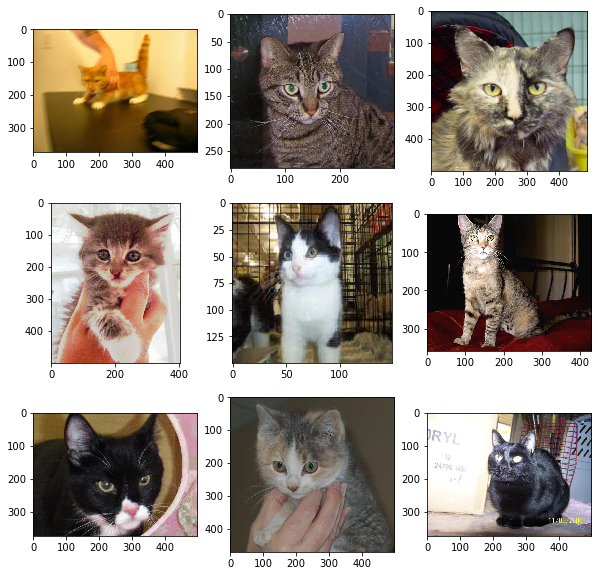

In [142]:
fig = plt.figure(figsize=(10,10))
i=0

for i in range(9):
    fig.add_subplot(3,3,i+1)
    plt.imshow(load_images[i])

plt.show()

# Let's see few images of dog

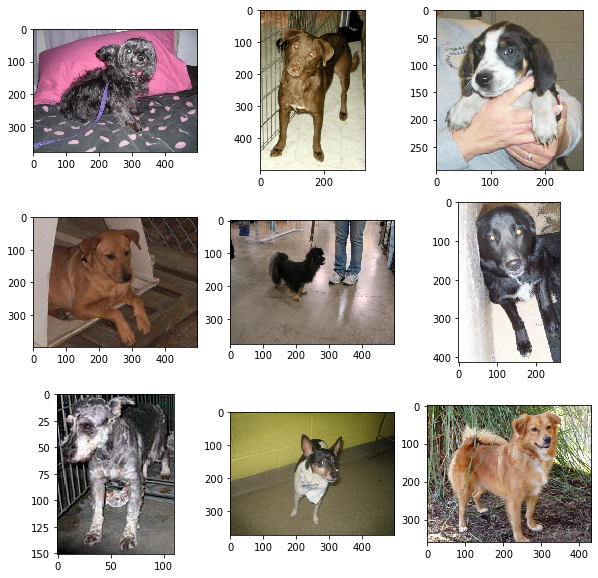

In [2]:
dog_dir = './images/new/Dog'

load_images = []
i=0
for file in os.listdir(dog_dir):
    if (i<9):
        cur_dir = os.path.join(dog_dir, file)
        load_images.append(load_img(cur_dir))
        i+=1
    else:
        break
        
fig = plt.figure(figsize=(10,10))
i=0

for i in range(9):
    fig.add_subplot(3,3,i+1)
    plt.imshow(load_images[i])

plt.show()

# Create Datagen to test preview image

In [44]:
file_path = './images/new'

#Count number of image for training
file_count = 0
for root, dirs, files in os.walk(file_path):
    file_count+=len(files)
print (file_count)

24998


In [4]:
datagen = ImageDataGenerator(
    rotation_range = 60,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range =0.1
)

In [153]:
#Delete all content under Preview folder
dir = './Preview'
for file in os.listdir(dir):
    path = os.path.join (dir, file)
    os.remove(path)

#get one image and test the datagen above.
img = load_img('./images/preview/9.jpg')
x=img_to_array(img)
x= x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x,batch_size=1, save_to_dir = 'preview', save_format='jpg', save_prefix='test'):
    i+=1
    if i>10:
        break
        
from numpy import asarray
data = asarray(img)
input_shape = data.shape

print(input_shape)

(426, 320, 3)


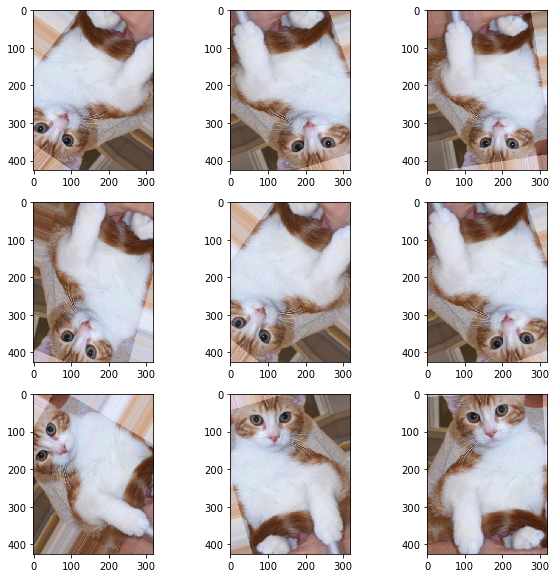

In [154]:
preview_dir = './preview'

load_images = []
i=0
for file in os.listdir(preview_dir):
    if (i<9):
        cur_dir = os.path.join(preview_dir, file)
        load_images.append(load_img(cur_dir))
        i+=1
    else:
        break
        
fig = plt.figure(figsize=(10,10))
i=0

for i in range(9):
    fig.add_subplot(3,3,i+1)
    plt.imshow(load_images[i])

plt.show()

# Create model for training

In [8]:
#build the model
model = Sequential()

model.add(Conv2D(32,(3,3), padding ='same', activation ='relu', input_shape = input_shape))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3),padding ='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),padding ='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()
C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:61: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  elif not isinstance(value, collections.Sized):


In [9]:
#train the model
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
             optimizer = 'adam',
             metrics =['accuracy'])

In [11]:
batch_size = 200
epochs = 30

ds_gen = ImageDataGenerator(
    validation_split=0.2,
    rescale =1./255,
    shear_range =0.2,
    zoom_range= 0.2,
    horizontal_flip=True
)

train_generator = ds_gen.flow_from_directory(
    directory=file_path, 
    target_size=(426, 320),
    batch_size=batch_size,
    shuffle = True,
    subset='training' 
)

validation_generator = ds_gen.flow_from_directory(
    directory=file_path,
    target_size=(426, 320),
    batch_size=batch_size,
    shuffle = True,
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


# Fitting the model

In [12]:
dl = model.fit_generator(
    train_generator,
    verbose =1,
    validation_data = validation_generator,
    epochs=epochs)

model.save('CatVSDog_151021.h5')

Epoch 1/30


C:\Users\Jimmy Yang\anaconda3\lib\site-packages\tensorflow\python\framework\tensor_util.py:538: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  tensor_proto.tensor_content = nparray.tostring()


100/100 [==============================] - 2020s 20s/step - loss: 0.6920 - acc: 0.5765 - val_loss: 0.6185 - val_acc: 0.6763
Epoch 2/30
100/100 [==============================] - 2354s 24s/step - loss: 0.5990 - acc: 0.6816 - val_loss: 0.5706 - val_acc: 0.7201
Epoch 3/30
100/100 [==============================] - 2492s 25s/step - loss: 0.5532 - acc: 0.7179 - val_loss: 0.5206 - val_acc: 0.7335
Epoch 4/30
100/100 [==============================] - 2644s 26s/step - loss: 0.5193 - acc: 0.7431 - val_loss: 0.4772 - val_acc: 0.7751
Epoch 5/30
100/100 [==============================] - 3236s 32s/step - loss: 0.4731 - acc: 0.7760 - val_loss: 0.4460 - val_acc: 0.7931
Epoch 6/30
100/100 [==============================] - 3290s 33s/step - loss: 0.4368 - acc: 0.7988 - val_loss: 0.4154 - val_acc: 0.8125
Epoch 7/30
100/100 [==============================] - 3100s 31s/step - loss: 0.4087 - acc: 0.8156 - val_loss: 0.3896 - val_acc: 0.8287
Epoch 8/30
100/100 [==============================] - 3168s 32s/st

# Evaluate Training and Validation

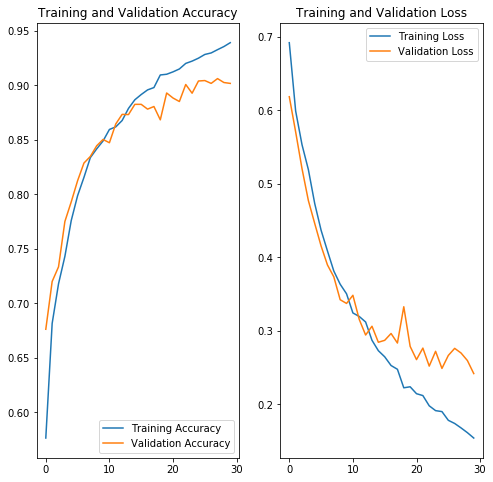

In [13]:
acc = dl.history['acc']
val_acc = dl.history['val_acc']

loss = dl.history['loss']
val_loss = dl.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing

In [77]:
classes = train_generator.class_indices
print (classes)

{'Cat': 0, 'Dog': 1}


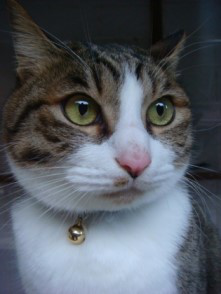

In [82]:
#Test Cat image first
import cv2

img_path = './images/test/test1.jpg'
load_img(img_path)

In [83]:
test_image = cv2.resize(cv2.imread(img_path), (320,426))
test = img_to_array(test_image)
test = test.reshape((1,)+ test.shape)

prediction = model.predict_classes(test)
print(prediction)

[0]


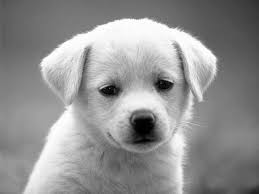

In [84]:
#Test Dog image
import cv2

img_path = './images/test/test2.jfif'
load_img(img_path)

In [81]:
test_image = cv2.resize(cv2.imread(img_path), (320,426))
test = img_to_array(test_image)
test = test.reshape((1,)+ test.shape)

prediction = model.predict_classes(test)
print(prediction)

[1]
